<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Feature_Expansion_and_the_Support_Vector_Machine_(SVM)_in_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


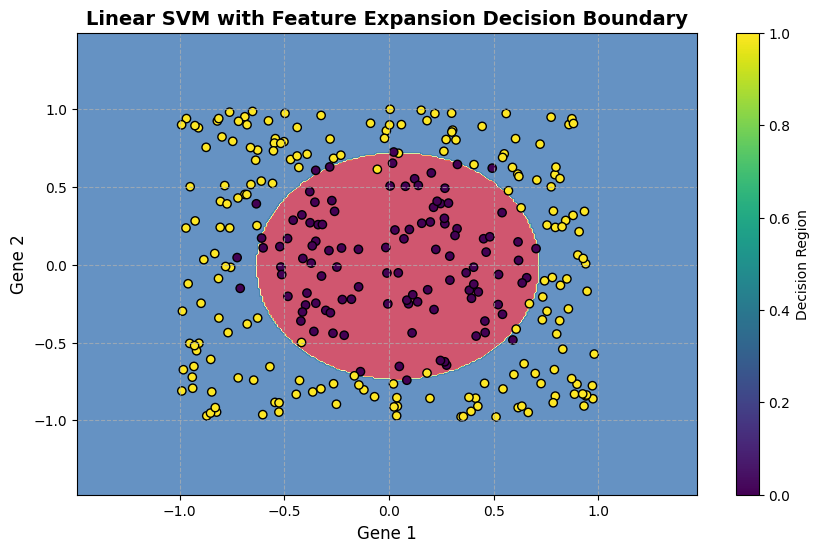

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


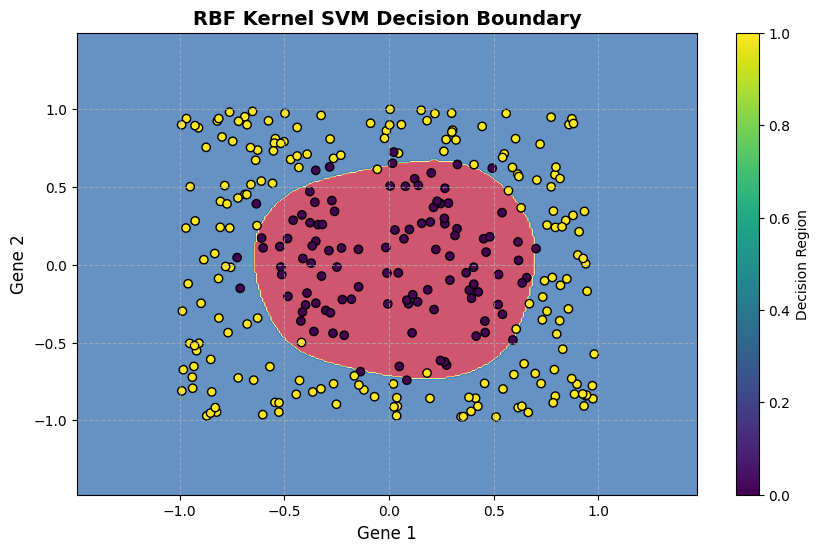

In [9]:
# Corrected Python code for visualizing SVM decision boundaries
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Simulating a synthetic dataset
np.random.seed(42)
n_samples = 300
gene_1 = np.random.uniform(-1, 1, n_samples)
gene_2 = np.random.uniform(-1, 1, n_samples)
target = ((gene_1 ** 2 + gene_2 ** 2 + 0.1 * np.random.randn(n_samples)) > 0.5).astype(int)

bio_data = pd.DataFrame({
    "Gene 1": gene_1,
    "Gene 2": gene_2,
    "Condition": target,
})

# Polynomial feature expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(bio_data.drop(columns=["Condition"]))
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
y = bio_data["Condition"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.3, random_state=42)

# Linear SVM on expanded features
svc_linear = SVC(kernel="linear", C=1, random_state=42, probability=True)
svc_linear.fit(X_train, y_train)

# RBF Kernel SVM
svc_rbf = SVC(kernel="rbf", C=1, gamma=0.5, random_state=42, probability=True)
svc_rbf.fit(X_train, y_train)

# Visualization helper functions
def plot_decision_boundary_with_transform(model, poly_transformer, scaler, X_original, y, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X_original[:, 0].min() - 0.5, X_original[:, 0].max() + 0.5
    y_min, y_max = X_original[:, 1].min() - 0.5, X_original[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_poly = poly_transformer.transform(grid_points)
    grid_points_poly_scaled = scaler.transform(grid_points_poly)
    Z = model.predict(grid_points_poly_scaled)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="Spectral")
    plt.scatter(X_original[:, 0], X_original[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Gene 1", fontsize=12)
    plt.ylabel("Gene 2", fontsize=12)
    plt.colorbar(label="Decision Region")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# Visualizing the linear SVM with expanded features
plot_decision_boundary_with_transform(
    svc_linear,
    poly,
    scaler,
    bio_data[["Gene 1", "Gene 2"]].to_numpy(),
    bio_data["Condition"].to_numpy(),
    "Linear SVM with Feature Expansion Decision Boundary"
)

# Visualizing the RBF kernel SVM
def plot_decision_boundary_rbf(model, scaler, X_original, y, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X_original[:, 0].min() - 0.5, X_original[:, 0].max() + 0.5
    y_min, y_max = X_original[:, 1].min() - 0.5, X_original[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(poly.transform(grid_points))
    Z = model.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="Spectral")
    plt.scatter(X_original[:, 0], X_original[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Gene 1", fontsize=12)
    plt.ylabel("Gene 2", fontsize=12)
    plt.colorbar(label="Decision Region")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

plot_decision_boundary_rbf(
    svc_rbf,
    scaler,
    bio_data[["Gene 1", "Gene 2"]].to_numpy(),
    bio_data["Condition"].to_numpy(),
    "RBF Kernel SVM Decision Boundary"
)
